In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
    # Load the dataset
health_import = pd.read_csv('HEALTH.csv')

    # Inspect
print(health_import.info())
print(health_import.tail())
print(health_import.describe())
print(health_import.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      740 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [3]:
    # Display unique values for categorical columns (up to 10 values)
categorical_columns = health_import.select_dtypes(include=['object']).columns
for col in categorical_columns:
   print(f"\nUnique values in {col}: {health_import[col].unique()[:10]}")


Unique values in Timestamp: ['8/27/2014 11:29' '8/27/2014 11:30' '8/27/2014 11:31' '8/27/2014 11:32'
 '8/27/2014 11:33' '8/27/2014 11:34' '8/27/2014 11:35' '8/27/2014 11:36'
 '8/27/2014 11:37' '8/27/2014 11:38']

Unique values in Gender: ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female']

Unique values in Country: ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia']

Unique values in state: ['IL' 'IN' nan 'TX' 'TN' 'MI' 'OH' 'CA' 'CT' 'MD']

Unique values in self_employed: [nan 'Yes' 'No']

Unique values in family_history: ['No' 'Yes']

Unique values in treatment: ['Yes' 'No']

Unique values in work_interfere: ['Often' 'Rarely' 'Never' 'Sometimes' nan]

Unique values in no_employees: ['25-Jun' 'More than 1000' '26-100' '100-500' '5-Jan' '500-1000']

Unique values in remote_work: ['No' 'Yes']

Unique values in tech_company: ['Yes' 'No']

Unique values in benefits: ['Yes' "Don'

In [4]:
#timestamp_count = health_import["Timestamp"].value_counts(dropna=False).to_dict()
#print(timestamp_count)
print(health_import["Timestamp"].head(20)), (health_import["Timestamp"].tail(20))

0     8/27/2014 11:29
1     8/27/2014 11:29
2     8/27/2014 11:29
3     8/27/2014 11:29
4     8/27/2014 11:30
5     8/27/2014 11:31
6     8/27/2014 11:31
7     8/27/2014 11:32
8     8/27/2014 11:32
9     8/27/2014 11:32
10    8/27/2014 11:32
11    8/27/2014 11:32
12    8/27/2014 11:33
13    8/27/2014 11:33
14    8/27/2014 11:33
15    8/27/2014 11:34
16    8/27/2014 11:34
17    8/27/2014 11:34
18    8/27/2014 11:34
19    8/27/2014 11:35
Name: Timestamp, dtype: object


(None,
 1239      4/4/2015 11:22
 1240      4/6/2015 14:58
 1241     4/11/2015 14:35
 1242     4/23/2015 14:03
 1243      5/5/2015 14:22
 1244      5/5/2015 15:16
 1245      5/6/2015 10:14
 1246      5/6/2015 16:55
 1247      5/7/2015 10:08
 1248     6/25/2015 12:24
 1249     7/22/2015 18:57
 1250     7/27/2015 23:25
 1251      8/17/2015 9:38
 1252     8/20/2015 16:52
 1253     8/25/2015 19:59
 1254     9/12/2015 11:17
 1255      9/26/2015 1:07
 1256     11/7/2015 12:36
 1257    11/30/2015 21:25
 1258      2/1/2016 23:04
 Name: Timestamp, dtype: object)

'Timestamp' appears to be WHEN each subject completed the survey.  
Dates range from August 2014 through February 2016.  
Likely kept as the identifier; no value to the variable: DROP  
'comments' does not have enough responses and very few ADD to the mental health picture: DROP

In [6]:
    # Drop undesired columns
health_inspect1 = health_import.drop(columns=['Timestamp', 'comments'])

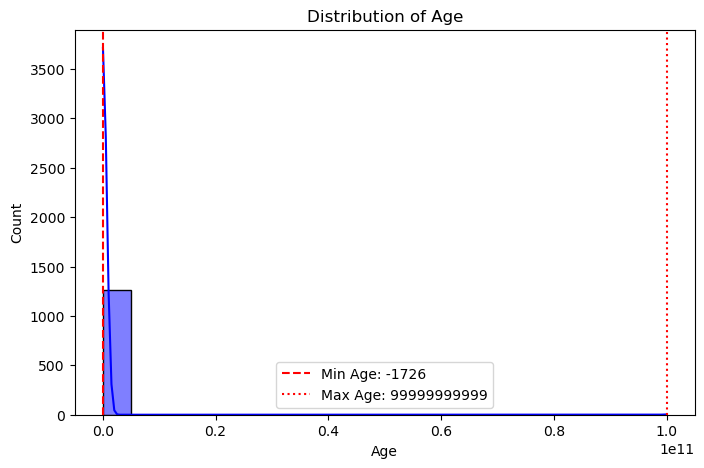

In [7]:
    # 8 'Age' values immediatetly stand out as eroneous; in the outlier areas
    # Identify the minimum and maximum values in the 'Age' column
min_age = health_inspect1['Age'].min()
max_age = health_inspect1['Age'].max()

    # Plot distribution
plt.figure(figsize=(8,5))
sns.histplot(health_inspect1['Age'], bins=20, kde=True, color="blue")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.axvline(min_age, color='red', linestyle='dashed', label=f"Min Age: {min_age}")
plt.axvline(max_age, color='red', linestyle='dotted', label=f"Max Age: {max_age}")
plt.legend()
plt.show()

In [8]:
    # Make a copy to preserve original
health_inspect2 = health_inspect1.copy()

    # Ensure all ages are positive (change -29 to 29)
health_inspect2['Age'] = health_inspect2['Age'].abs()

    # Get mean of ages 18 to 72
test_1 = health_inspect2[(health_inspect2['Age'] > 17) & (health_inspect2['Age'] < 73)]
mean_age = int(test_1['Age'].mean())

    # Replace all outliers (17>Age<73) with the mean
health_inspect2.loc[(health_inspect2['Age'] < 17) | (health_inspect2['Age'] > 73), 'Age'] = mean_age

In [9]:
# Confirm
print(health_inspect2.head(6)), (health_inspect2.tail(7))

   Age  Gender         Country state self_employed family_history treatment  \
0   37  Female   United States    IL           NaN             No       Yes   
1   44       M   United States    IN           NaN             No        No   
2   32    Male          Canada   NaN           NaN             No        No   
3   31    Male  United Kingdom   NaN           NaN            Yes       Yes   
4   31    Male   United States    TX           NaN             No        No   
5   33    Male   United States    TN           NaN            Yes        No   

  work_interfere    no_employees remote_work  ...   anonymity  \
0          Often          25-Jun          No  ...         Yes   
1         Rarely  More than 1000          No  ...  Don't know   
2         Rarely          25-Jun          No  ...  Don't know   
3          Often          26-100          No  ...          No   
4          Never         100-500         Yes  ...  Don't know   
5      Sometimes          25-Jun          No  ...  Don't

(None,
       Age Gender         Country state self_employed family_history treatment  \
 1252   29   male   United States    NC            No            Yes       Yes   
 1253   36   Male   United States    UT            No            Yes        No   
 1254   26   male  United Kingdom   NaN            No             No       Yes   
 1255   32   Male   United States    IL            No            Yes       Yes   
 1256   34   male   United States    CA            No            Yes       Yes   
 1257   46      f   United States    NC            No             No        No   
 1258   25   Male   United States    IL            No            Yes       Yes   
 
      work_interfere    no_employees remote_work  ...   anonymity  \
 1252      Sometimes         100-500         Yes  ...         Yes   
 1253         Rarely  More than 1000          No  ...  Don't know   
 1254            NaN          26-100          No  ...  Don't know   
 1255          Often          26-100         Yes  ...      

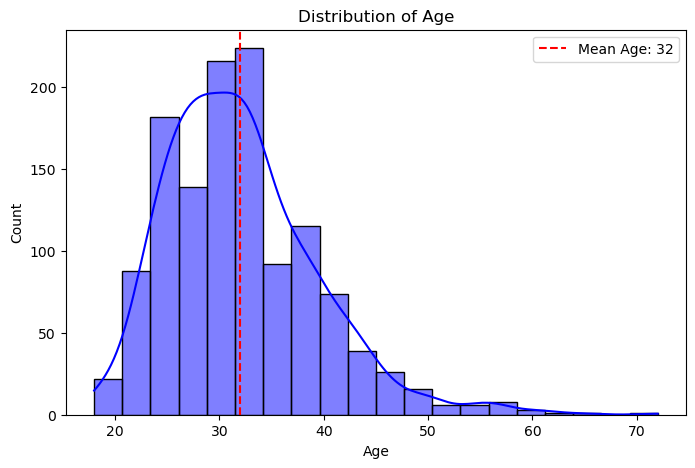

In [10]:
    # Plot cleaned Age distribution
plt.figure(figsize=(8,5))
sns.histplot(health_inspect2['Age'], bins=20, kde=True, color="blue")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.axvline(mean_age, color='red', linestyle='dashed', label=f"Mean Age: {mean_age}")
plt.ylabel("Count")
plt.legend()
plt.show()

In [11]:
    # Gender stands out as needing inspection
health_inspect2['Gender'].value_counts(dropna=False).sort_index(ascending=False)

Gender
woman                                               1
something kinda male?                               1
queer/she/they                                      1
queer                                               1
p                                                   1
ostensibly male, unsure what that really means      1
non-binary                                          1
msle                                                1
male leaning androgynous                            1
male                                              206
maile                                               1
m                                                  34
fluid                                               1
female                                             62
femail                                              1
f                                                  15
cis-female/femme                                    1
cis male                                            1
Woman                

In [12]:
    # Make a copy to preserve original
health_transform = health_inspect2.copy()

    # Transform gender into three groups: '0', '1', '-1'
def categorize_gender(value):
    # Normalize strings
   value = str(value).strip().lower()  
    
    # Define known male / female identifiers, categorize undefined or ambiguous gender values
   female_cat = {'female', 'f', 'woman', 'cis female', 'cis-female/femme', 'femake', 
                         'femail', 'female (cis)'}
   male_cat = {'male', 'm', 'man', 'cis male', 'cis man', 'malr', 'mal', 'mail', 
                        'make', 'msle', 'maile', 'male-ish', 'male (cis)', 'something kinda male?',
                        'ostensibly male, unsure what that really means', 'male leaning androgynous',
                        'Guy (-ish) ^_^', }

   if value in female_cat: return '0'
   elif value in male_cat: return '1'
   else:                   return '-1'  

    # Apply the categorization to the Gender column
health_transform.loc[:, 'Gender'] = health_transform['Gender'].apply(categorize_gender)

In [13]:
# Confirm
health_transform['Gender'].value_counts().sort_index()

Gender
-1     18
0     247
1     994
Name: count, dtype: int64

Looking to compare USA vs Other countries, so 18 Gender '-1' will not need to be dropped now

In [15]:
    # Make a copy to preserve original
health_tform2 = health_transform.copy()

    # Alter 'Country': US -> 1, all Other -> 0
health_tform2['Country'] = health_tform2['Country'].apply(lambda x: 1 if x == 'United States' else 0)
health_tform2['Country'] = health_tform2['Country'].astype('category')

    # Replace NA values in 'state' with 'XX'
health_tform2['state'] = health_tform2['state'].fillna('XX')

In [16]:
# Confirm
#print(health_tform2.head())
print(health_tform2['Country'].value_counts())
#print(health_tform2['state'].value_counts())

Country
1    751
0    508
Name: count, dtype: int64


In [17]:
    # Change missing values in 'self_employed' to 'No'; employed by tech company
health_tform2.fillna({'self_employed': 'No'}, inplace=True)

In [18]:
# Confirm
health_tform2['self_employed'].value_counts(dropna=False)

self_employed
No     1113
Yes     146
Name: count, dtype: int64

In [19]:
    # Make a copy to preserve original
health_tform3 = health_tform2.copy()

    # With 260 NA, do not want to drop all, convert for interpolation
work_interfere_map = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3}

    # Convert to numerical values for interpolation
health_tform3['work_interfere'] = health_tform3['work_interfere'].map(work_interfere_map)

    # Perform linear interpolation
health_tform3['work_interfere'] = health_tform3['work_interfere'].interpolate(method='linear')

    # Convert to ordered categorical
health_tform3['work_interfere'] = pd.Categorical(
    health_tform3['work_interfere'].round().astype(int),
    categories=[0, 1, 2, 3], 
    ordered=True)

In [20]:
    # Confirm
health_tform3['work_interfere'].isna().sum(), health_tform3['work_interfere'].dtype

(0,
 CategoricalDtype(categories=[0, 1, 2, 3], ordered=True, categories_dtype=int64))

In [21]:
    # Make a copy to preserve original
health_tform4 = health_tform3.copy()

    # Correct misinterpreted values in number of employees
health_tform4['no_employees'] = health_tform4['no_employees'].replace({
    '5-Jan': '1-5', 
    '25-Jun': '6-25'})

    # Define mapping based on below rules
employee_category_map = {'1-5': 0, '6-25': 0,                 # SMALL : 1-25 employees→ 0
                         '26-100': 1, '100-500': 1,           # MEDIUM : 26-500 employees→ 1
                         '500-1000': 2, 'More than 1000': 2}  # LARGE : 500+ employees→ 2

    # Convert 'no_employees' 
health_tform4['no_employees'] = health_tform4['no_employees'].map(employee_category_map)

    # Keep as ordered categorical
health_tform4['no_employees'] = pd.Categorical(
    health_tform4['no_employees'], 
    categories=[0, 1, 2], 
    ordered=True)

In [22]:
# Confirm
health_tform4['no_employees'].dtype

CategoricalDtype(categories=[0, 1, 2], ordered=True, categories_dtype=int64)

In [23]:
    # Change "Don't know" and 'Not sure' to 'No'
    # Questions similar to "Do you know the options for mental health care your employer provides?"
health_tform4 = health_tform4.map(
    lambda x: 'No' if isinstance(x, str) and x.strip().lower() in ["don't know", "not sure"] else x)

In [24]:
    # Change 'Some of them' to 'Yes'
    # Questions similar to "Willing to discuss your mental health with a supervisor?"
health_tform5 = health_tform4.map(
    lambda x: 'Yes' if isinstance(x, str) and x.strip().lower() in ["some of them"] else x)

In [25]:
    # Change other columns to categorical with Yes/No and a few Maybe
bi_columns = ['self_employed', 'family_history', 'treatment', 'remote_work', 'tech_company', 
              'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 
              'mental_health_consequence', 'phys_health_consequence', 'mental_health_interview', 
              'phys_health_interview', 'coworkers', 'supervisor', 'mental_vs_physical', 'obs_consequence']

    # To fix warning
pd.set_option('future.no_silent_downcasting', True)

    # Convert Yes/No to 1/0 and Maybe to -1
health_tform5[bi_columns] = (health_tform5[bi_columns]
    .replace({'No': 0, 'Yes': 1, 'Maybe': '-1'})
    .astype('category'))

In [26]:
    # Convert remaining object columns to categorical
object_columns = health_tform5.select_dtypes(include=['object']).columns.tolist()
for col in object_columns:
   health_tform5[col] = health_tform5[col].astype('category')
    
    # Verify the unique values to confirm the transformation
print(health_tform5[bi_columns].nunique())

self_employed                2
family_history               2
treatment                    2
remote_work                  2
tech_company                 2
benefits                     2
care_options                 2
wellness_program             2
seek_help                    2
anonymity                    2
mental_health_consequence    3
phys_health_consequence      3
mental_health_interview      3
phys_health_interview        3
coworkers                    2
supervisor                   2
mental_vs_physical           2
obs_consequence              2
dtype: int64


In [27]:
    # Make a final copy of the cleaned dataset
health_df = health_tform5.copy()

    # Confirm
print(health_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        1259 non-null   int64   
 1   Gender                     1259 non-null   category
 2   Country                    1259 non-null   category
 3   state                      1259 non-null   category
 4   self_employed              1259 non-null   category
 5   family_history             1259 non-null   category
 6   treatment                  1259 non-null   category
 7   work_interfere             1259 non-null   category
 8   no_employees               1259 non-null   category
 9   remote_work                1259 non-null   category
 10  tech_company               1259 non-null   category
 11  benefits                   1259 non-null   category
 12  care_options               1259 non-null   category
 13  wellness_program           1259 n

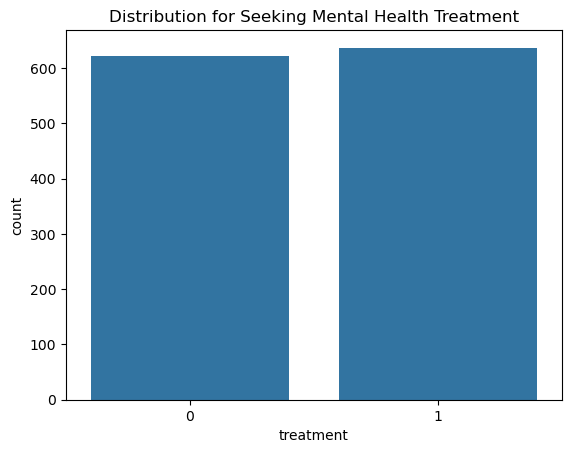

In [28]:
    # Check target variable balance
sns.countplot(x='treatment', data=health_df)
plt.title("Distribution for Seeking Mental Health Treatment")
plt.show()

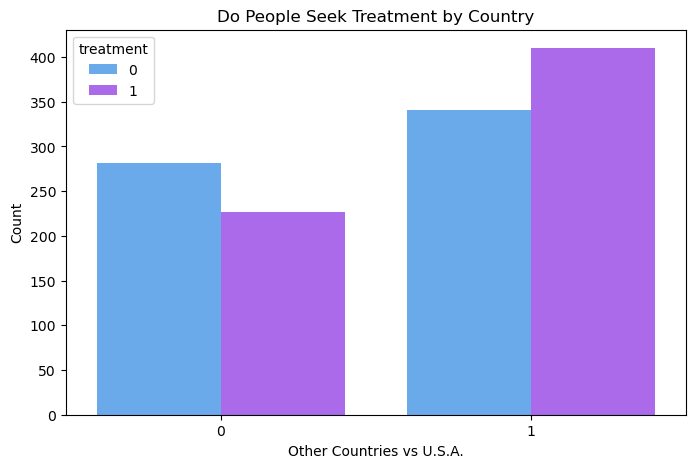

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x='Country', hue='treatment', data=health_df, palette='cool')
plt.title("Do People Seek Treatment by Country")
plt.xlabel("Other Countries vs U.S.A.")
plt.ylabel("Count")
plt.show()

In [30]:
import itertools
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

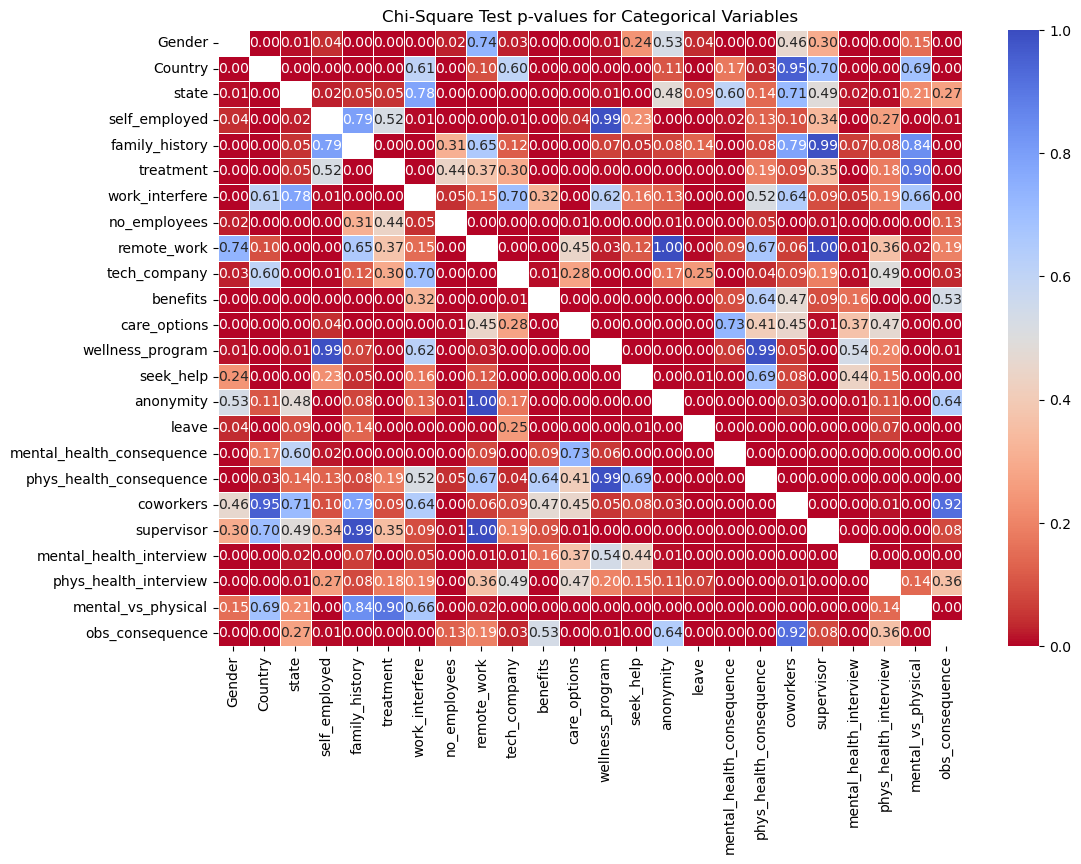

In [31]:
    # Function to calculate Chi-Square p-value
def chi_square_test(x, y):
   """Perform Chi-Square test of independence and return p-value."""
   contingency_table = pd.crosstab(x, y)
   chi2, p, _, _ = stats.chi2_contingency(contingency_table)
   return p

    # Select categorical columns
categorical_columns = health_df.select_dtypes(include=['category']).columns.tolist()

    # Compute Cramér's V and Chi-Square tests for all categorical variable pairs
chi_square_results = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1, col2 in itertools.combinations(categorical_columns, 2):
   chi_square_results.loc[col1, col2] = chi_square_test(health_df[col1], health_df[col2])
   chi_square_results.loc[col2, col1] = chi_square_results.loc[col1, col2] 

    # Convert results to numeric for readability
chi_square_results = chi_square_results.astype(float)

    # Display the Chi-Square test results heatmap (p-values)
plt.figure(figsize=(12, 8))
sns.heatmap(chi_square_results, annot=True, cmap="coolwarm_r", fmt=".2f", linewidths=0.5)
plt.title("Chi-Square Test p-values for Categorical Variables")
plt.show()

In [32]:
    # Make a copy to preserve original
health_test2 = health_df.drop(columns=['state'])

    # Convert 'leave' to ordered categorical
health_test2['leave'] = pd.Categorical(
    health_test2['leave'],
    categories=["Don't know", "Very easy", "Somewhat easy", "Somewhat difficult", "Very difficult"],
    ordered=True)

    # Rename categories
leave_mapping = {
    "Don't know": 0,
    "Very easy": 1,
    "Somewhat easy": 2,
    "Somewhat difficult": 3,
    "Very difficult": 4}

health_test2['leave'] = health_test2['leave'].cat.rename_categories(leave_mapping)

In [33]:
    # Encode dummy Vars
health_dum = pd.get_dummies(health_test2, drop_first=True)
health_dum

,Age,Gender_0,Gender_1,Country_1,self_employed_1,family_history_1,treatment_1,work_interfere_1,work_interfere_2,work_interfere_3,...,phys_health_consequence_1,phys_health_consequence_-1,coworkers_1,supervisor_1,mental_health_interview_1,mental_health_interview_-1,phys_health_interview_1,phys_health_interview_-1,mental_vs_physical_1,obs_consequence_1
0,37,True,False,True,False,False,True,False,False,True,...,False,False,True,True,False,False,False,True,True,False
1,44,False,True,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,32,False,True,False,False,False,False,True,False,False,...,False,False,True,True,True,False,True,False,False,False
3,31,False,True,False,False,True,True,False,False,True,...,True,False,True,False,False,True,False,True,False,True
4,31,False,True,True,False,False,False,False,False,False,...,False,False,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,False,True,False,False,False,True,False,True,False,...,False,False,True,True,False,False,False,False,False,False
1255,32,False,True,True,False,True,True,False,False,True,...,False,False,True,True,False,False,False,False,True,False
1256,34,False,True,True,False,True,True,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1257,46,True,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
    # Define features and target variable
X = health_dum.drop(columns=['treatment_1'])
y = health_dum['treatment_1']

    # Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

In [35]:
    # Initialize Logistic Regression Model
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)

    # Predictions
y_log_pred = log_model.predict(X_test)
y_prob_pred = log_model.predict_proba(X_test)[:, 1]

print("Log Accuracy:", accuracy_score(y_test, y_log_pred))
print("Log F1 score:", f1_score(y_test, y_log_pred))
print("Log Confusion Matrix:\n", confusion_matrix(y_test, y_log_pred))
print("Log Classification Report:\n", classification_report(y_test, y_log_pred))

Log Accuracy: 0.6944444444444444
Log F1 score: 0.6907630522088354
Log Confusion Matrix:
 [[89 38]
 [39 86]]
Log Classification Report:
               precision    recall  f1-score   support

       False       0.70      0.70      0.70       127
        True       0.69      0.69      0.69       125

    accuracy                           0.69       252
   macro avg       0.69      0.69      0.69       252
weighted avg       0.69      0.69      0.69       252



In [36]:
    # Feature Importance (Coefficients), ensure array is 1-dimensional
log_features = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": log_model.coef_.ravel()  
}).sort_values(by="Coefficient", ascending=False)

log_features["Odds Ratio"] = np.exp(log_features["Coefficient"])
print(log_features)

                         Feature  Coefficient  Odds Ratio
8               work_interfere_3     2.837219   17.068235
7               work_interfere_2     1.811055    6.116900
6               work_interfere_1     1.440204    4.221558
5               family_history_1     1.289815    3.632115
14                care_options_1     0.925057    2.522012
26                   coworkers_1     0.671712    1.957586
13                    benefits_1     0.515936    1.675206
22   mental_health_consequence_1     0.510893    1.666778
23  mental_health_consequence_-1     0.441245    1.554641
30       phys_health_interview_1     0.390801    1.478165
17                   anonymity_1     0.286301    1.331493
28     mental_health_interview_1     0.260715    1.297858
33             obs_consequence_1     0.255024    1.290493
20                       leave_3     0.235035    1.264953
21                       leave_4     0.232227    1.261405
9                 no_employees_1     0.095206    1.099885
12            

In [37]:
    # Initialize SVM Model (Kernel for Nonlinearity)
svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=500)
svm_model.fit(X_train, y_train)

    # Make Predictions w probabilities
y_svm_pred = svm_model.predict(X_test)
y_svm_prob = svm_model.predict_proba(X_test)[:, 1] 

    # Classification Metrics
print("SVM Accuracy:", accuracy_score(y_test, y_svm_pred))
print("SVM F1 Score:", f1_score(y_test, y_svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_svm_pred))
print("Classification Report:\n", classification_report(y_test, y_svm_pred))

SVM Accuracy: 0.626984126984127
SVM F1 Score: 0.5877192982456141
Confusion Matrix:
 [[91 36]
 [58 67]]
Classification Report:
               precision    recall  f1-score   support

       False       0.61      0.72      0.66       127
        True       0.65      0.54      0.59       125

    accuracy                           0.63       252
   macro avg       0.63      0.63      0.62       252
weighted avg       0.63      0.63      0.62       252



In [38]:
from sklearn.inspection import permutation_importance

    # Compute permutation importance
perm_importance = permutation_importance(svm_model, X_test, y_test, 
                scoring="accuracy", n_repeats=10, random_state=500)

    # Store df
feature_importance = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": perm_importance.importances_mean 
}).sort_values(by="Importance", ascending=False)

# Display feature importance
print(feature_importance)

                         Feature  Importance
5               family_history_1    0.034524
3                      Country_1    0.016667
0                            Age    0.011905
13                    benefits_1    0.008730
9                 no_employees_1    0.007540
23  mental_health_consequence_-1    0.007143
27                  supervisor_1    0.007143
8               work_interfere_3    0.005952
21                       leave_4    0.004365
11                 remote_work_1    0.003175
2                       Gender_1    0.003175
12                tech_company_1    0.000794
28     mental_health_interview_1    0.000397
10                no_employees_2    0.000000
32          mental_vs_physical_1    0.000000
31      phys_health_interview_-1    0.000000
18                       leave_1    0.000000
19                       leave_2    0.000000
6               work_interfere_1    0.000000
4                self_employed_1    0.000000
24     phys_health_consequence_1    0.000000
15        

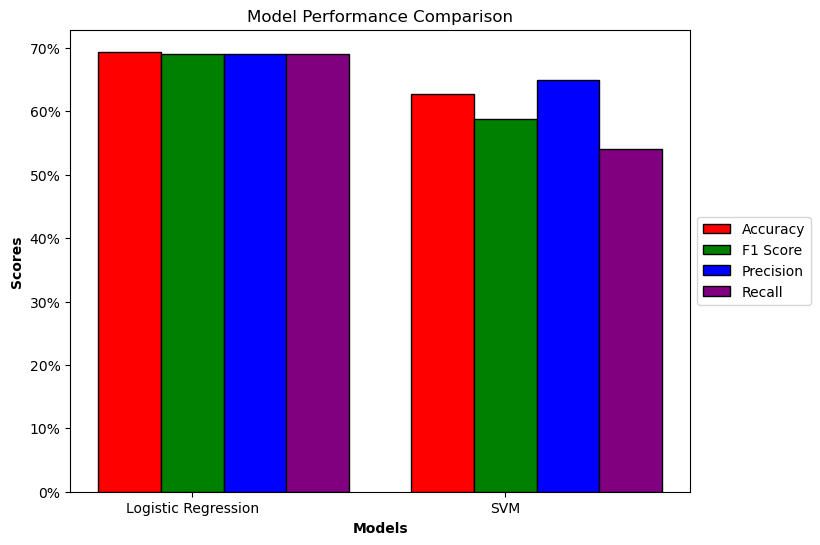

In [39]:
import matplotlib.ticker as mtick

    # Model names and metrics
models = ['Logistic Regression', 'SVM']
accuracy = [0.694, 0.627]
f1score = [0.691, 0.588]
precision = [0.69, 0.65]
recall = [0.69, 0.54]

    # Bar options
bar_width = 0.2

    # Set positions for bars
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

     # Plot Bar chart Metrics
plt.figure(figsize=(8,6))
plt.bar(r1, accuracy, color='red', width=bar_width, edgecolor='black', label='Accuracy')
plt.bar(r2, f1score, color='green', width=bar_width, edgecolor='black', label='F1 Score')
plt.bar(r3, precision, color='blue', width=bar_width, edgecolor='black', label='Precision')
plt.bar(r4, recall, color='purple', width=bar_width, edgecolor='black', label='Recall')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title("Model Performance Comparison")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()